In [1]:
from svd_tool import plot_singular
from svd_tool import plot_ce_index
from svd_tool import analysis_u
from svd_tool import macro_analysis
from svd_tool import micro_analysis_jac
from svd_tool import micro_analysis_ig
from svd_tool import save_macro
from svd_tool import set_up
from svd_tool import save_cg
import torch
import numpy as np
import matplotlib.pyplot as plt

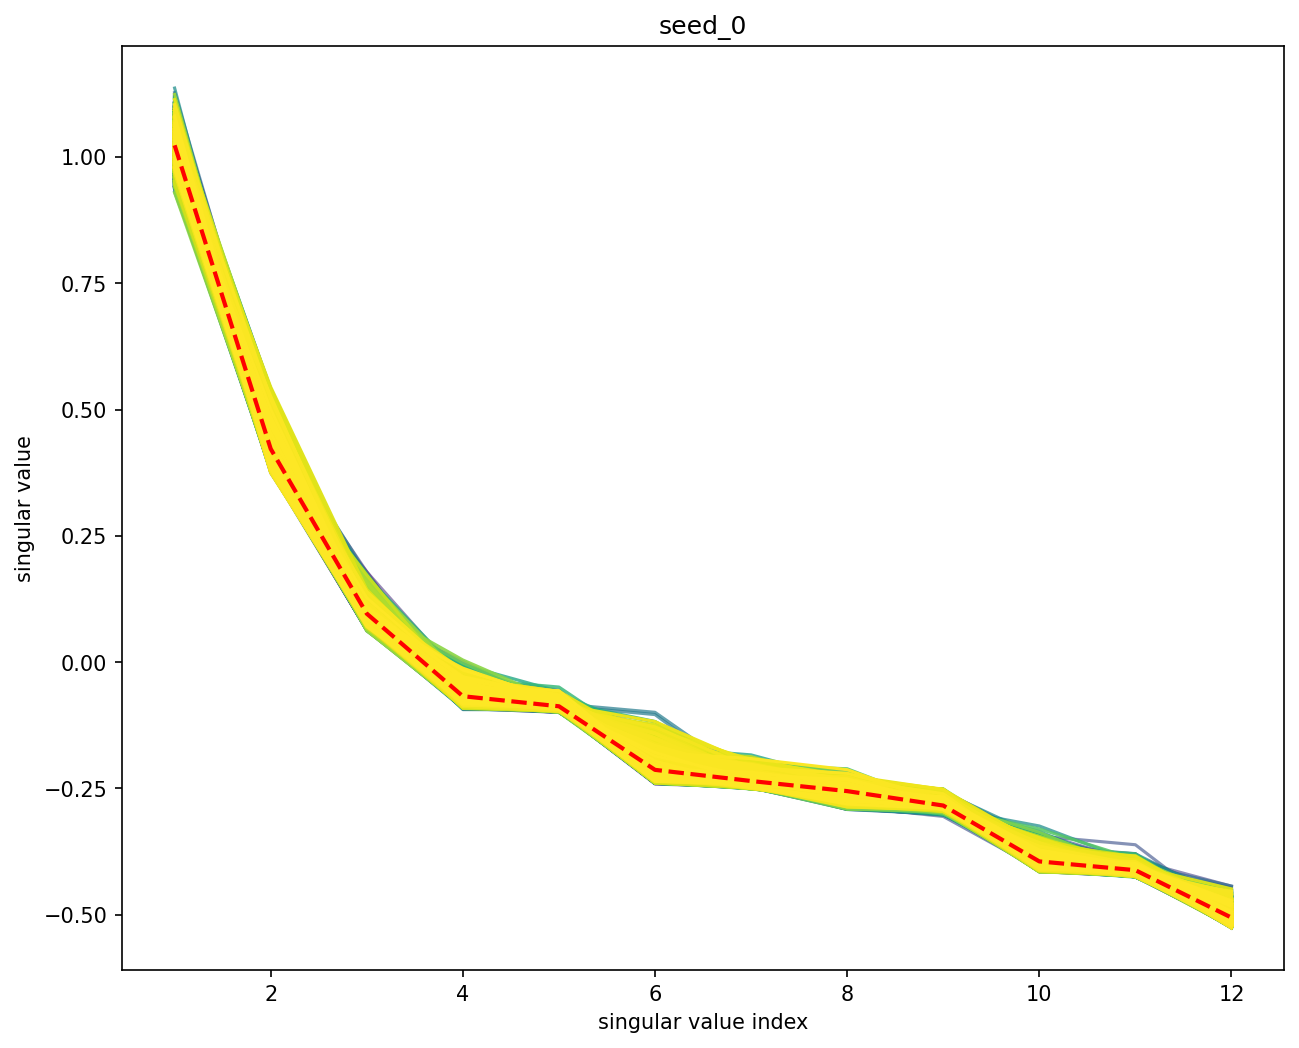

In [18]:
setting = 'long_term_forecast_macro_dyn_seed42_NN_Spring_sl1_pl1_dm128_layer3_flocnormal_'
start = 1
end = 9995
interval = 1
seq_len = 1
singular, us, vts, mats, Sigs = plot_singular(setting, seed = 1, start=start, end=end, interval=interval, log_bool=True)


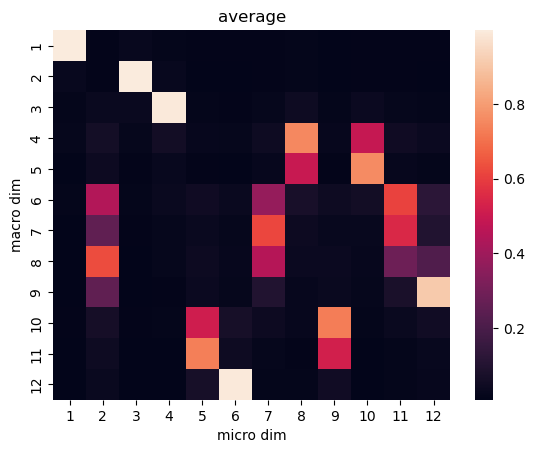

In [19]:
micro_dims = 12
macro_dims = 12
cg_mat_abs = analysis_u(us, micro_dims, start, end, interval, macro_dim=macro_dims, seq_len=1, abs_bool=True, mean_bool=True, show_bool=False)

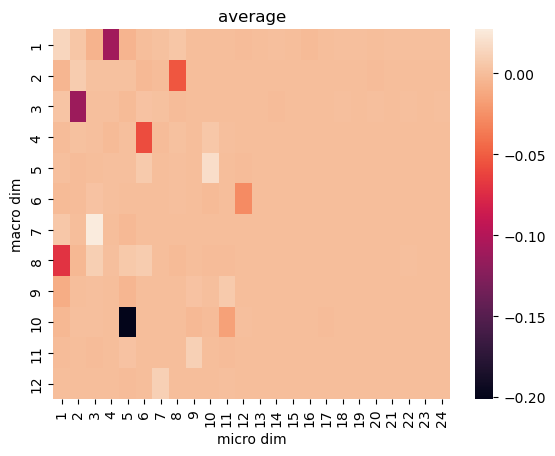

In [16]:
cg_mat = analysis_u(us, micro_dims, start, end, interval, macro_dim=macro_dims, seq_len=1, abs_bool=False, mean_bool=True, show_bool=False)

In [5]:
micro_path = "../dataset/Spring/6_group2.csv"
macro_path = f"../dataset/Spring/spring_{micro_dims}_to_{macro_dims}"
save_cg(cg_mat, micro_dims, macro_dims, micro_path, macro_path)

In [17]:
micro_path = "../dataset/Spring/6_group2_42.csv"
macro_path = f"../dataset/Spring/macro_{macro_dims}.csv"
save_macro(cg_mat, macro_dims, micro_path, macro_path, one_serie=True)

In [26]:
micro_path = f"../dataset/Couzin/macro_{micro_dims}.csv"
macro_path = f"../dataset/Couzin/Couzin_{micro_dims}_to_{macro_dims}"
save_cg(cg_mat, micro_dims, macro_dims, micro_path, macro_path)

In [39]:
setting = 'long_term_forecast_2birds_macro_again_NN_Couzin_sl1_pl1_dm128_layer1_flocnormal_'
model = set_up(setting+'0')
device = next(model.parameters()).device
print(f"模型所在的设备：{device}")

模型所在的设备：cpu


In [32]:
initial_value = np.array([-16, -11, -15, -15, 1, 2,  23])
initial_value = np.array([-17.76,4.52,-14.46,9.28,-0.21,-17.55,-5.11])
def multi_step_predict(model, initial_value, steps_to_predict):
    model.eval()
    model_dtype = next(model.parameters()).dtype
    current_value = initial_value
    current_value = np.expand_dims(current_value, axis=0) # 增加一个维度，变成 (1, sequence_length, feature_dimension)
    current_value = np.expand_dims(current_value, axis=0)
    predictions = [current_value]
    current_value = torch.tensor(current_value, dtype=model_dtype)
    for _ in range(steps_to_predict):
        # 预测下一步
        predicted_value = model(current_value)[0]
        predictions.append(predicted_value.detach().numpy())
        current_value = predicted_value
    return np.array(predictions)
seqs = multi_step_predict(model, initial_value, 100)

In [40]:
initial_value = np.array([1.2])
seqs = multi_step_predict(model, initial_value, 100)

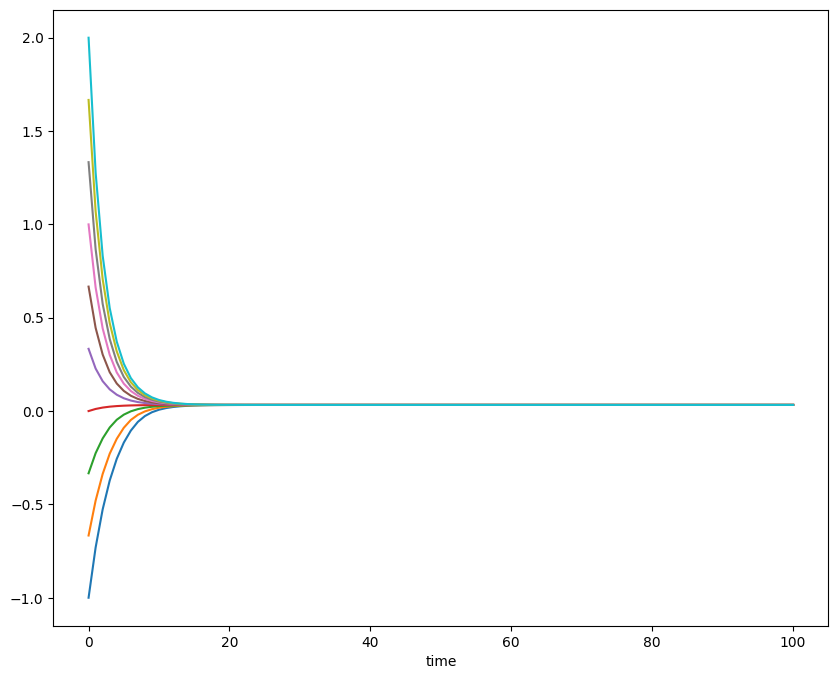

In [44]:
plt.figure(figsize=(10, 8))
for i in np.linspace(-1,2,10):
    initial_value = np.array([i])
    seqs = multi_step_predict(model, initial_value, 100)
    plt.plot(seqs[:,0,0,0])
    plt.xlabel('time')
plt.show()

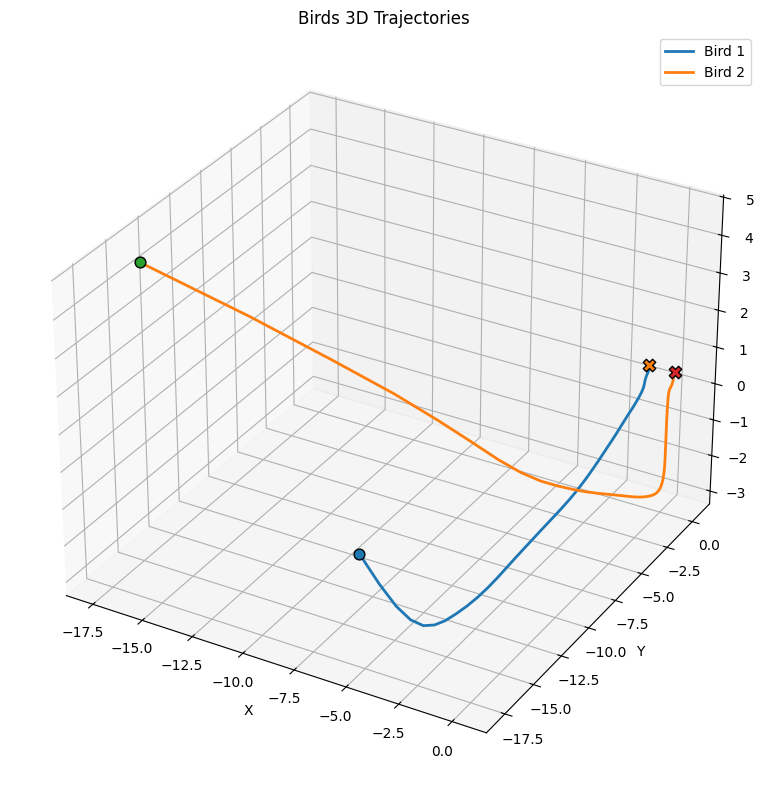

In [33]:
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')
#marker_interval = 100  # 每 20 步做一个标记
#colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
#cmap = plt.get_cmap('plasma') 
#colors = [cmap(i) for i in np.linspace(0, 1, n_birds)]

# 假定DataFrame无列名可直接iloc，否则你可以用对应列名
x = seqs[:,0,0,6]
y = seqs[:,0,0,0]
z = seqs[:,0,0,4]
x1 = seqs[:,0,0,5]
y1 = seqs[:,0,0,2]
z1 = seqs[:,0,0,1]
# x = seqs[:,0,0,0]
# y = seqs[:,0,0,1]
# z = seqs[:,0,0,2]
# x1 = seqs[:,0,0,3]
# y1 = seqs[:,0,0,4]
# z1 = seqs[:,0,0,5]
ax.plot3D(x, y, z, label=f'Bird {1}', linewidth=2)
ax.scatter(x[0], y[0], z[0], marker='o', s=60, edgecolors='k')
ax.scatter(x[-1], y[-1], z[-1], marker='X', s=80, edgecolors='k')
ax.plot3D(x1, y1, z1, label=f'Bird {2}', linewidth=2)
ax.scatter(x1[0], y1[0], z1[0], marker='o', s=60, edgecolors='k')
ax.scatter(x1[-1], y1[-1], z1[-1], marker='X', s=80, edgecolors='k')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Birds 3D Trajectories')
ax.legend()
plt.tight_layout()
plt.show()
plt.close()  # 关闭窗口，防止重复显示

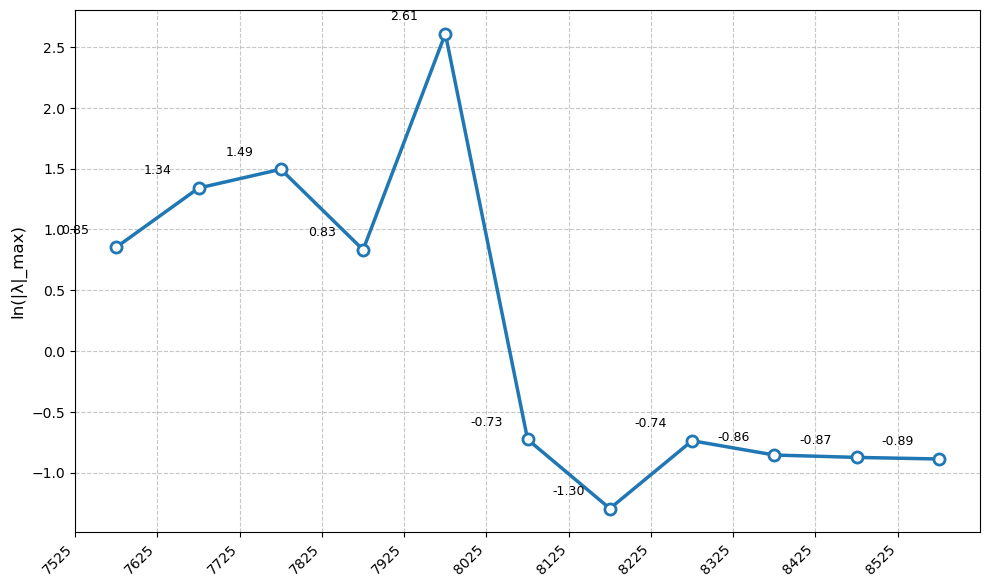

In [38]:
macro_analysis(us, mats, start, end, interval)

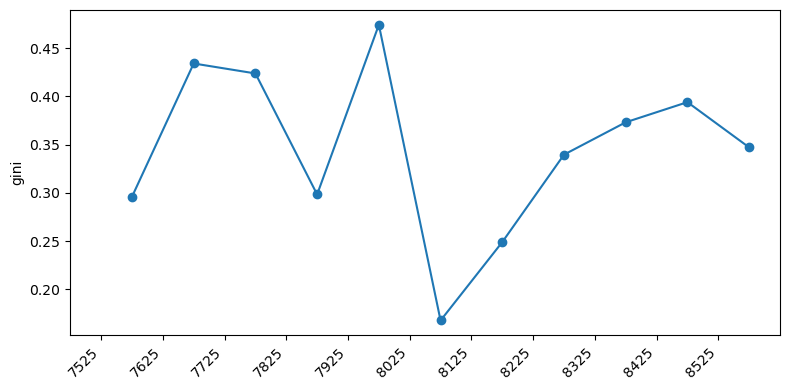

In [39]:
plot_ce_index(gn, gn_std)

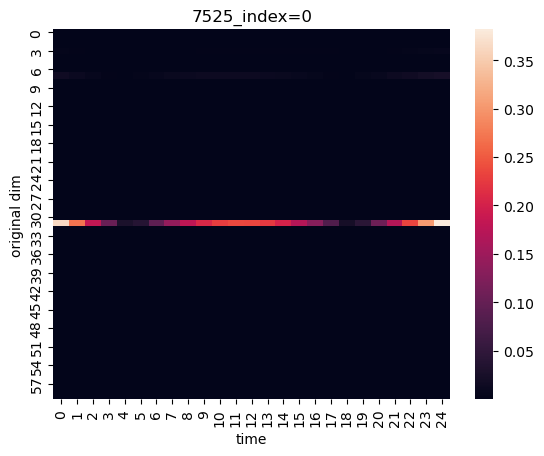

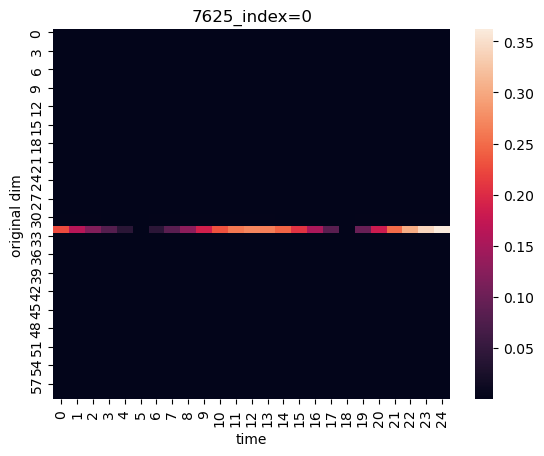

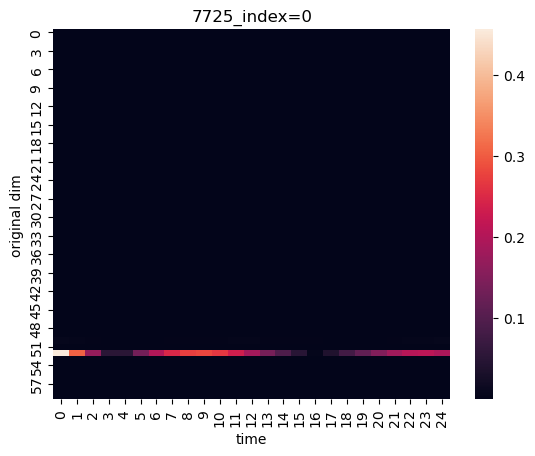

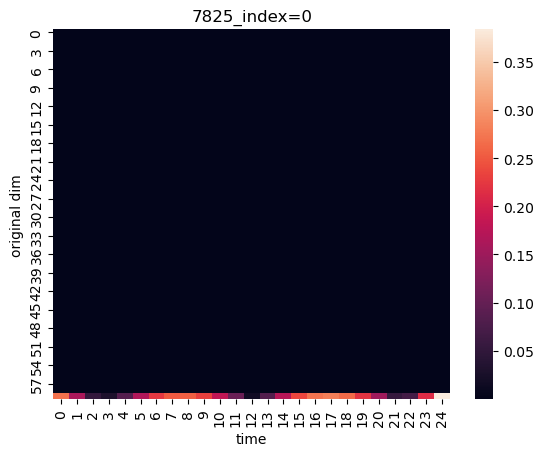

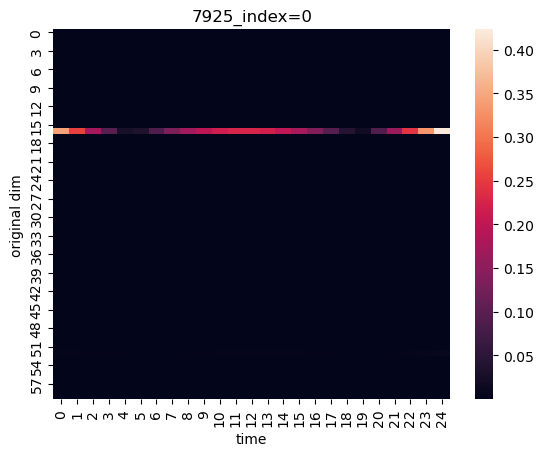

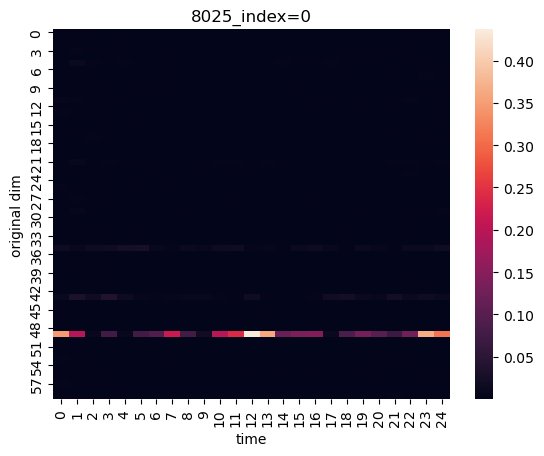

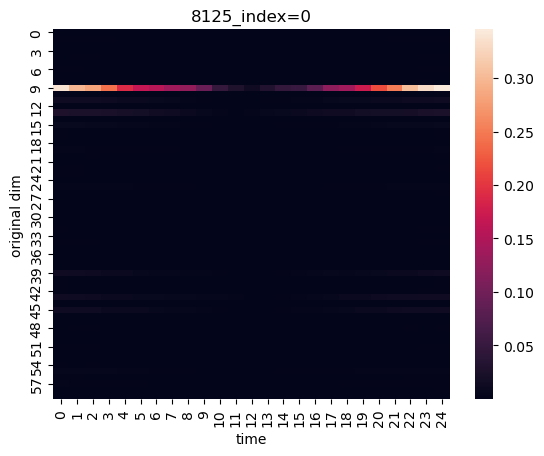

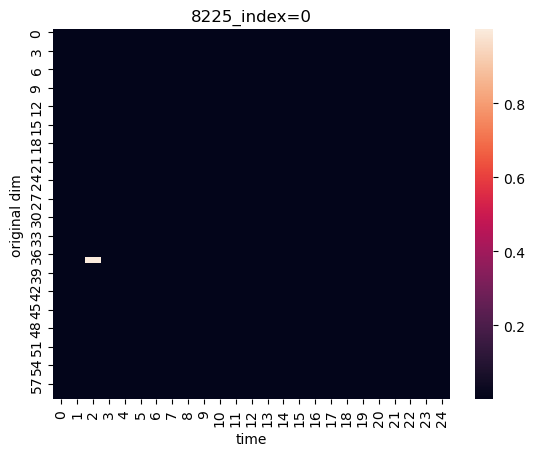

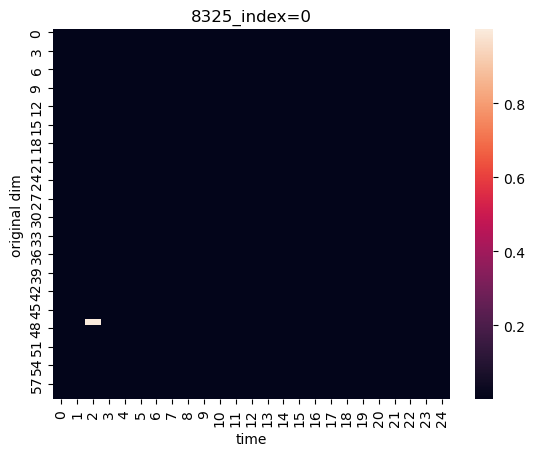

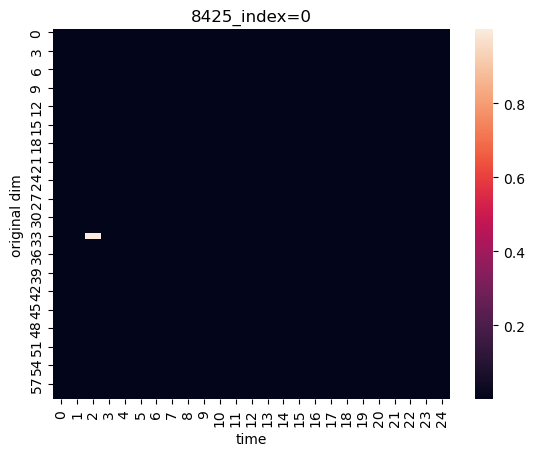

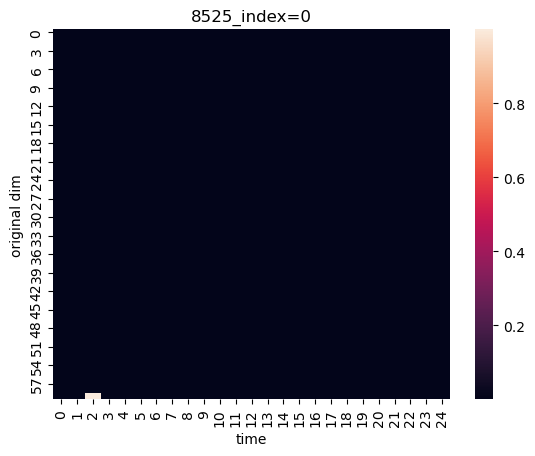

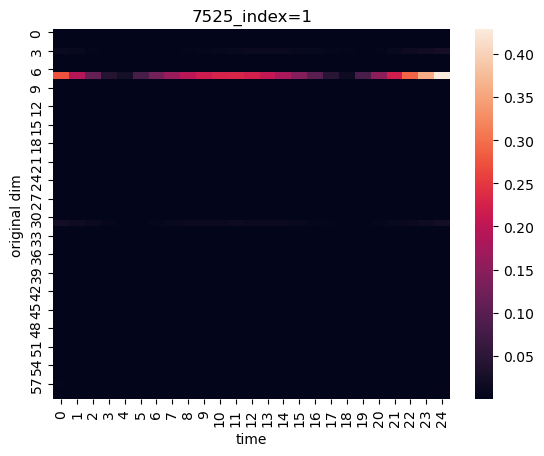

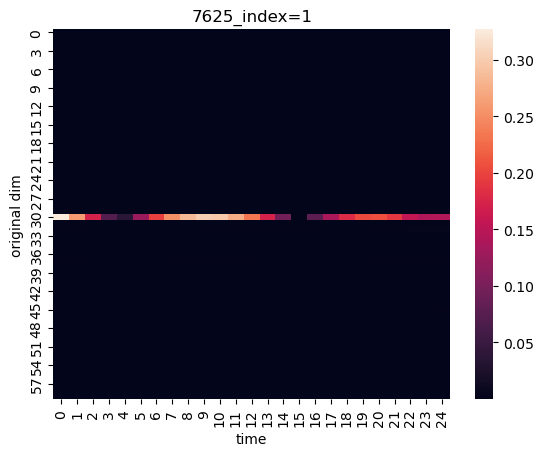

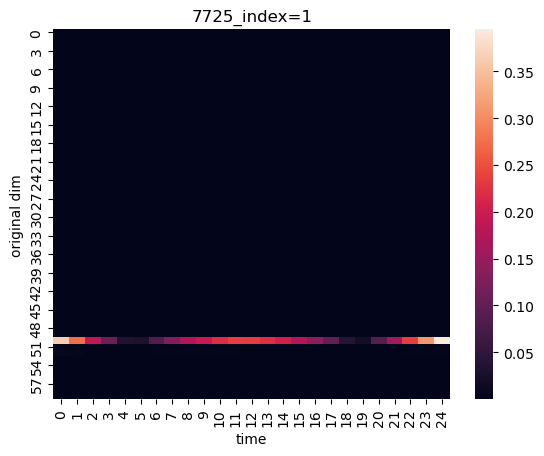

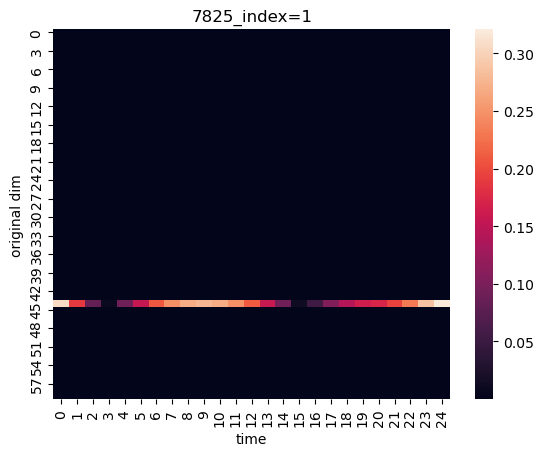

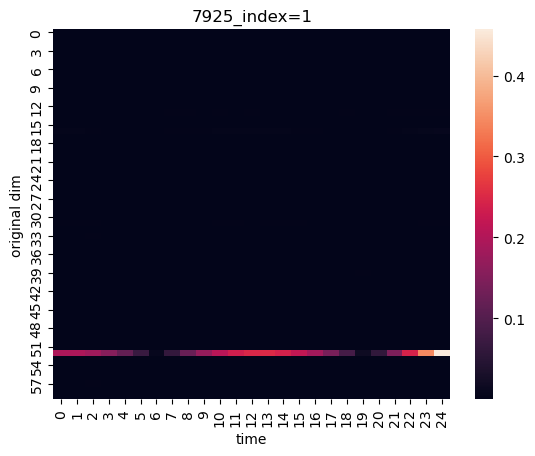

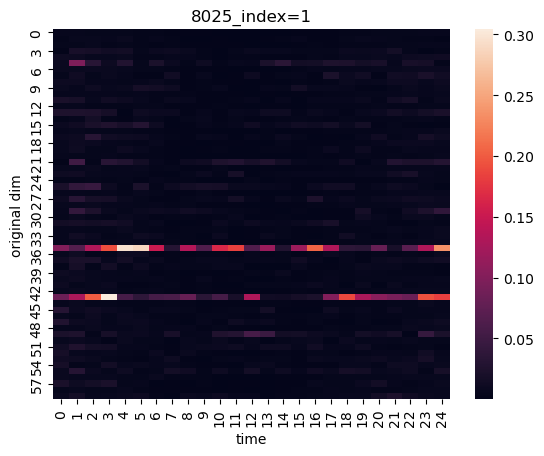

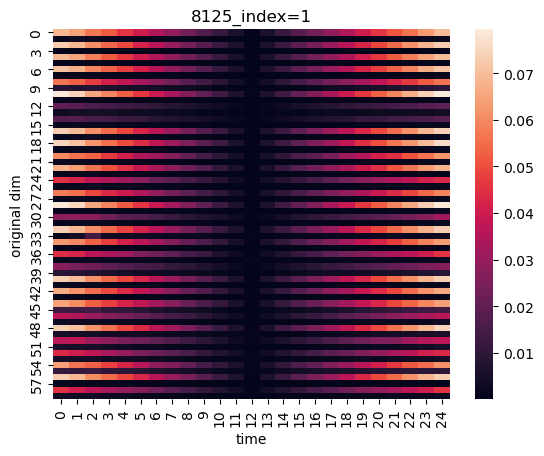

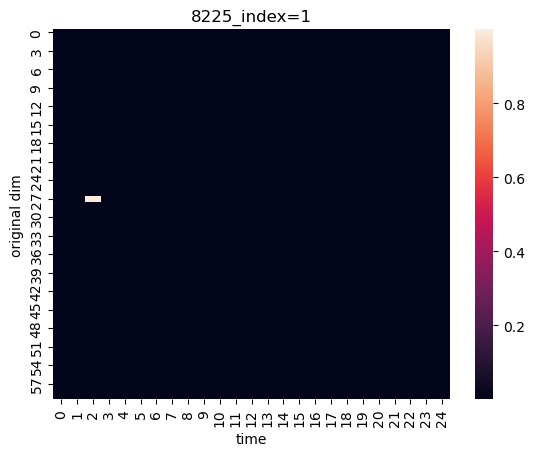

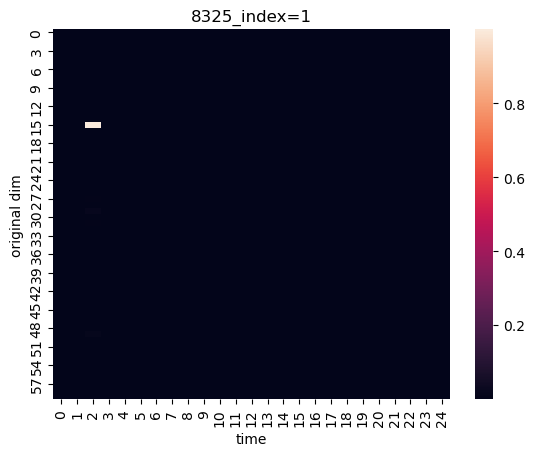

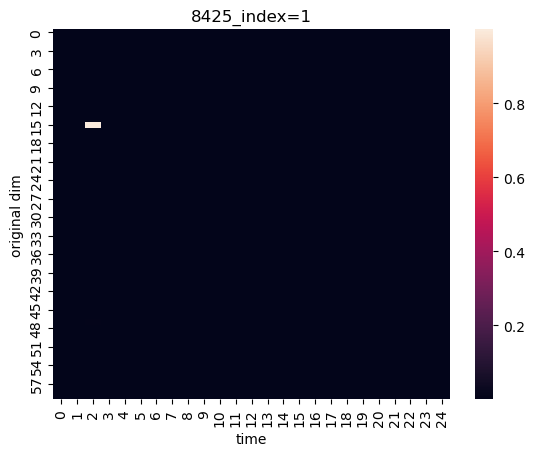

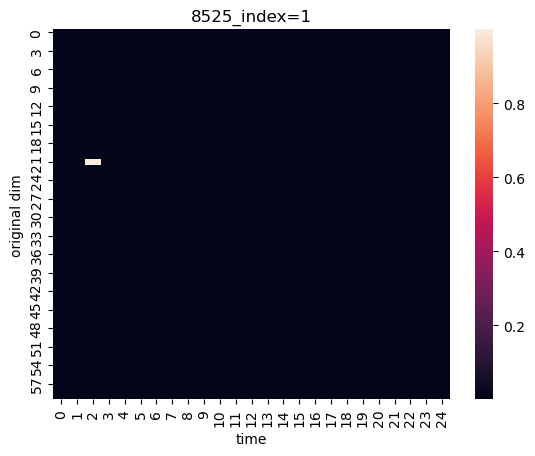

In [30]:
analysis_u(us, seq_len=25, dims=60, start=start, end=end, interval=interval, target=[0,1])

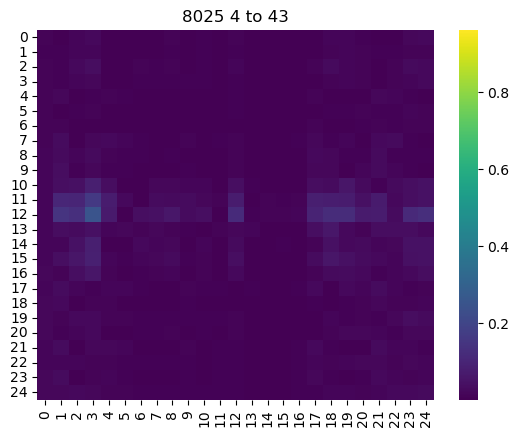

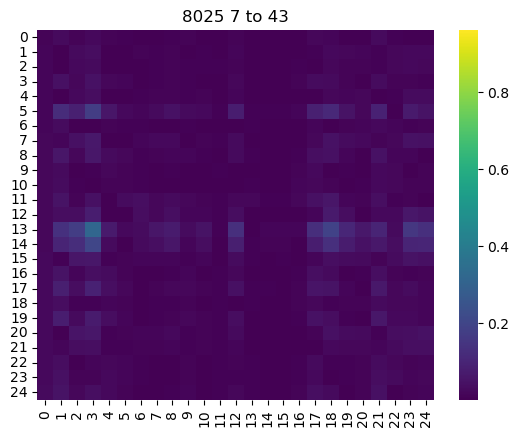

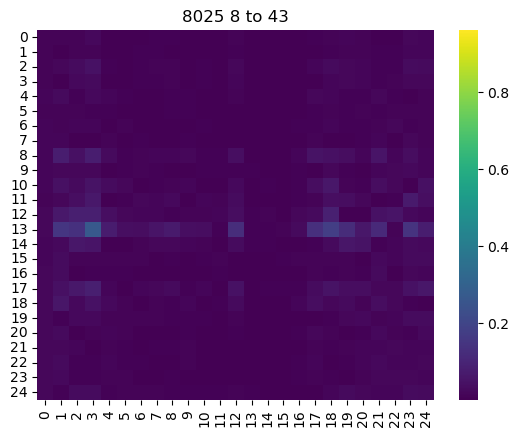

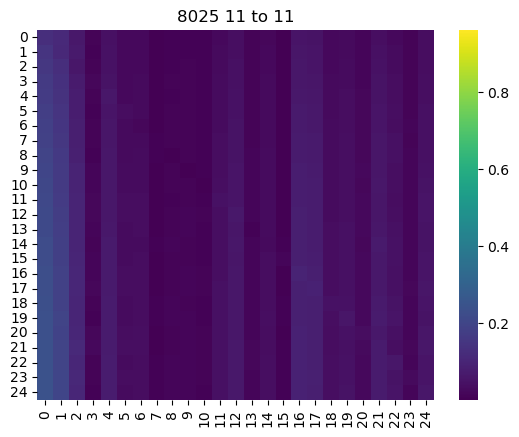

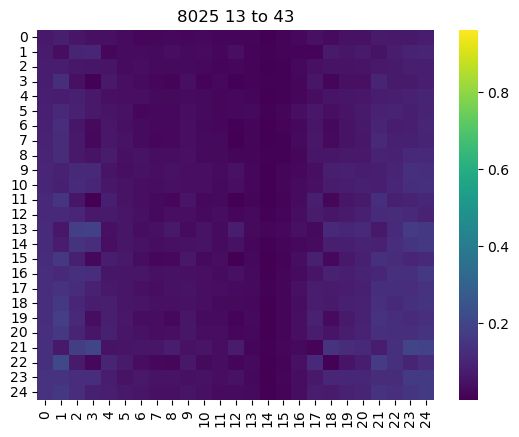

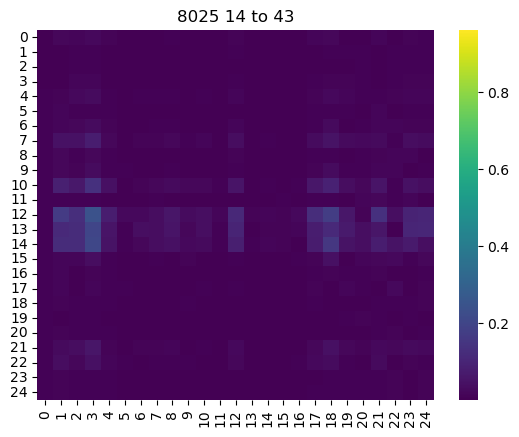

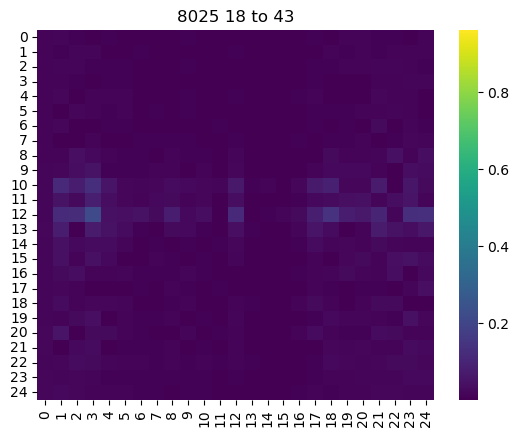

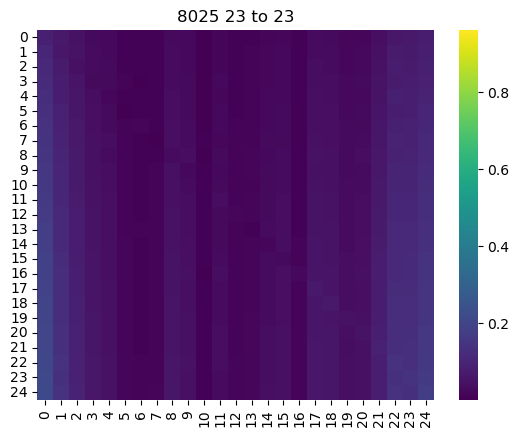

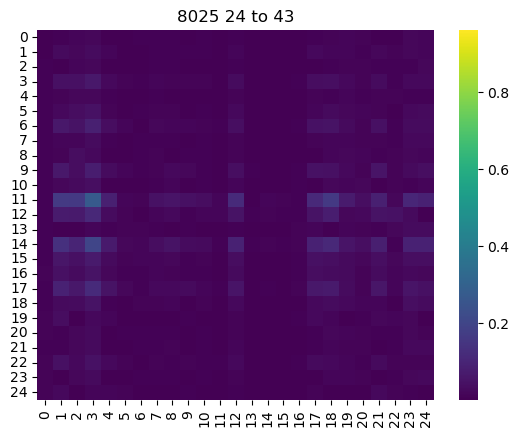

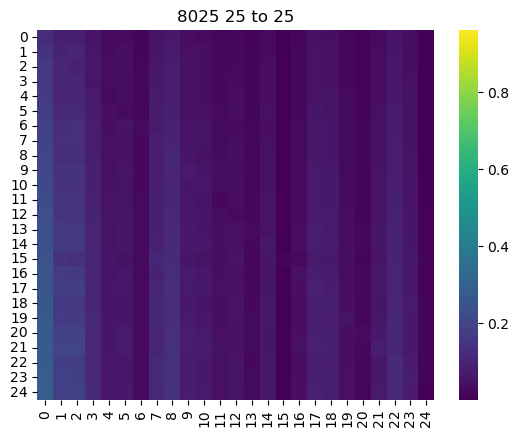

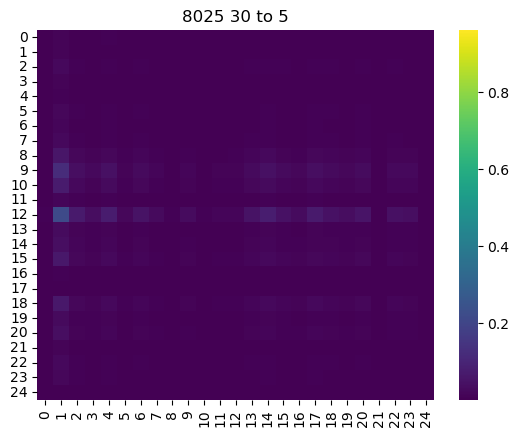

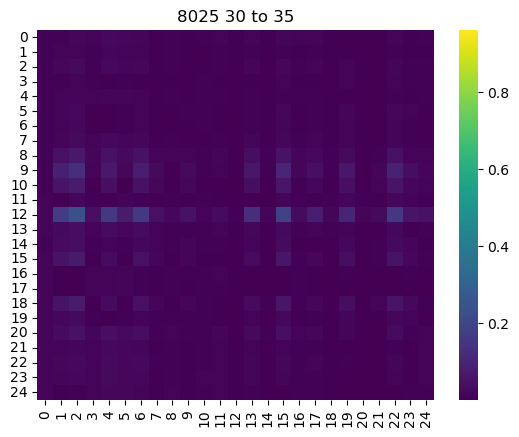

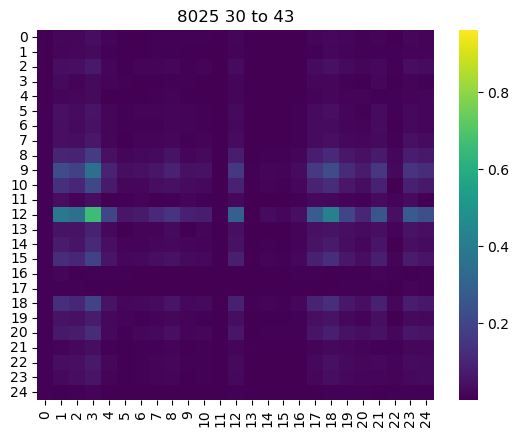

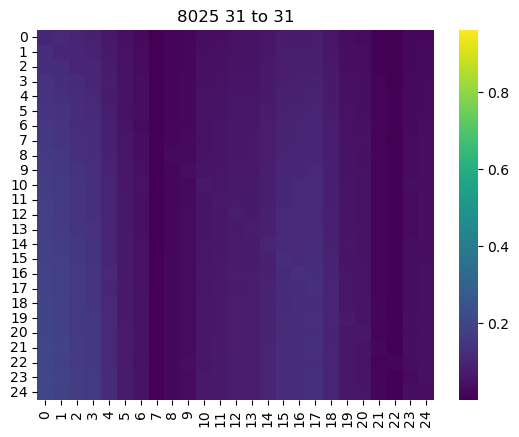

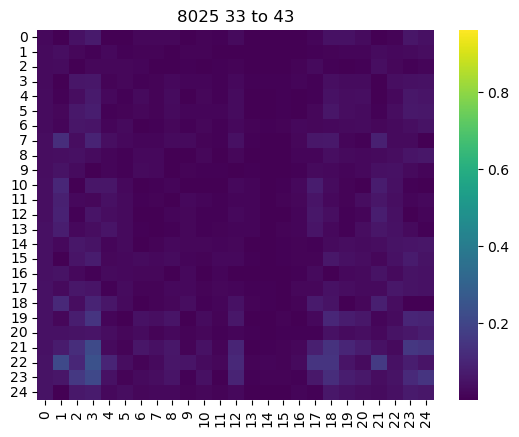

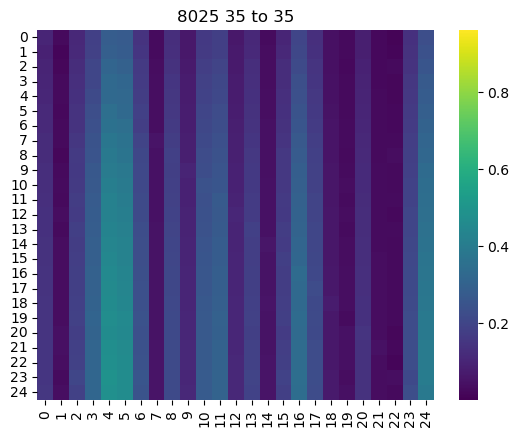

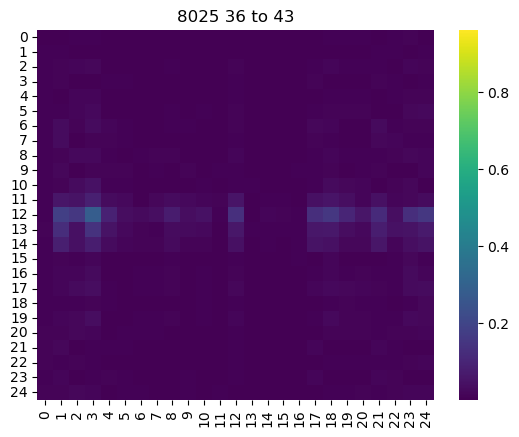

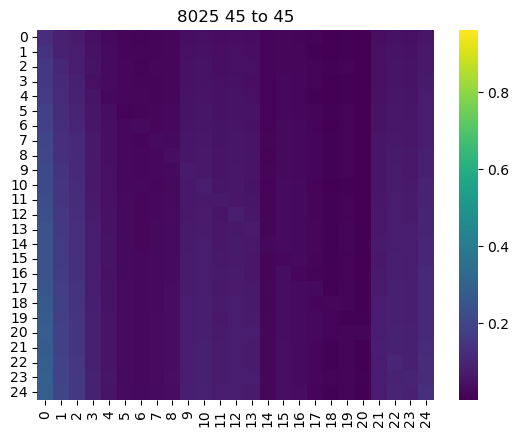

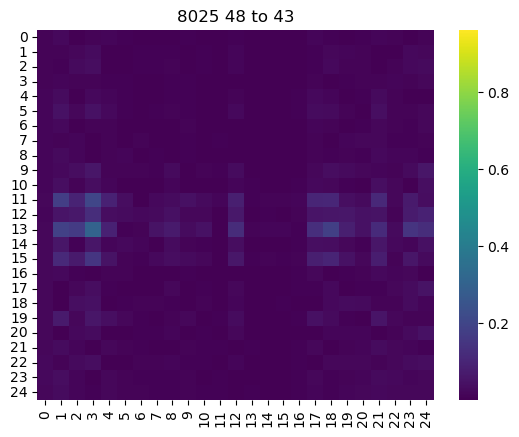

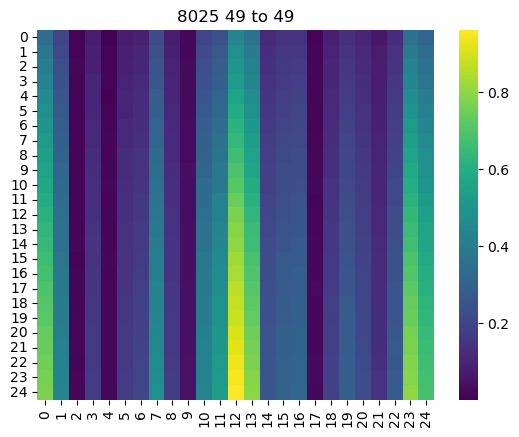

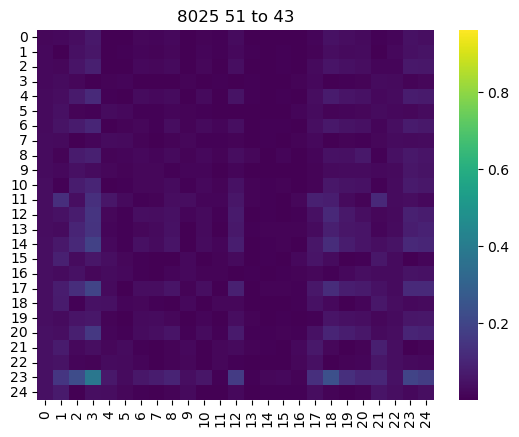

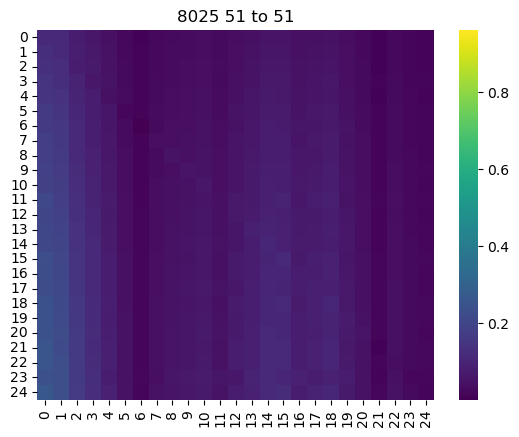

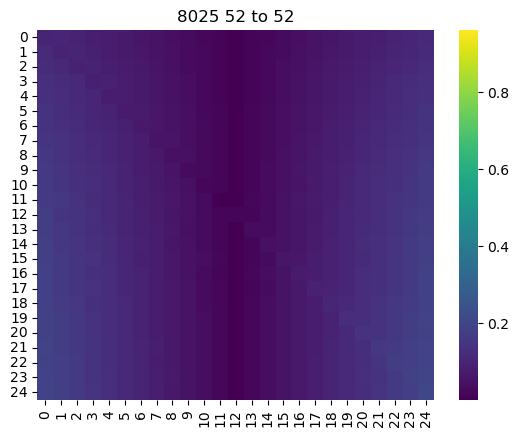

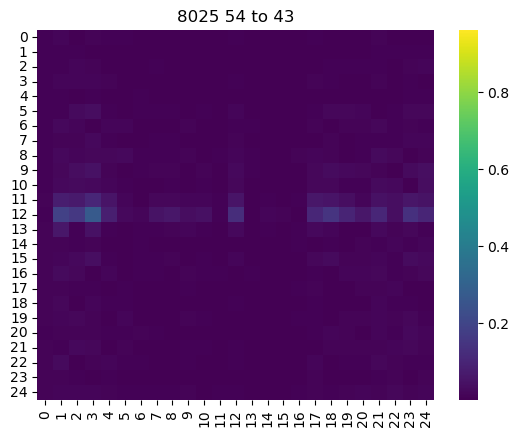

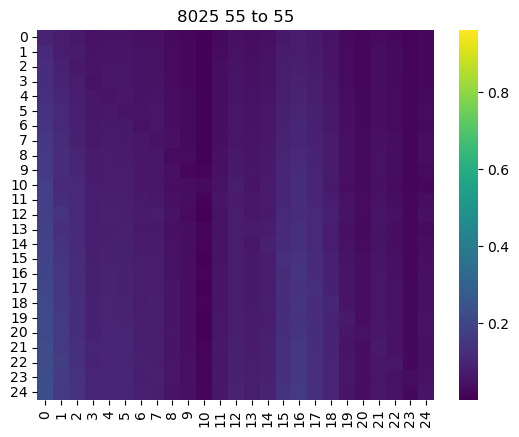

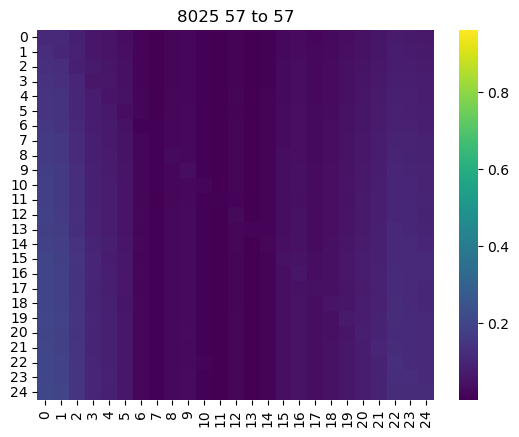

In [32]:
micro_analysis_jac(test_id, period=8025, dims=60, seed=0, causes='all', effects='all', eps=0.2)

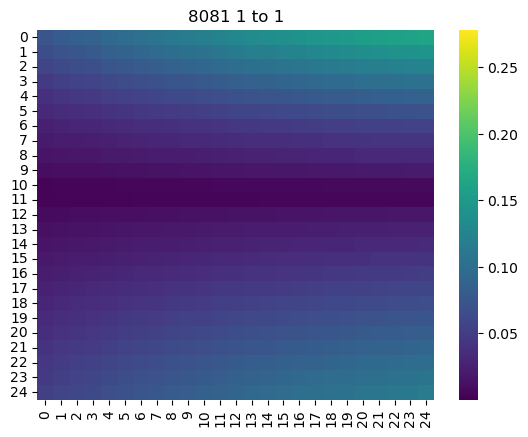

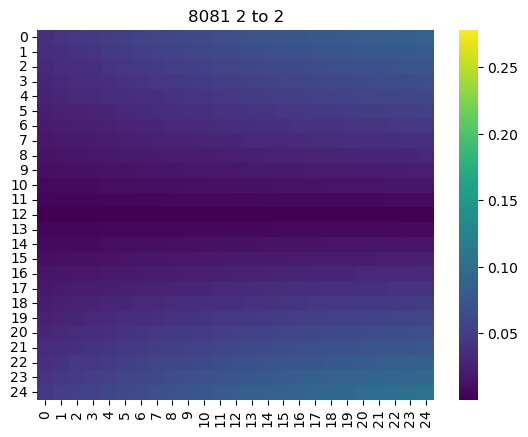

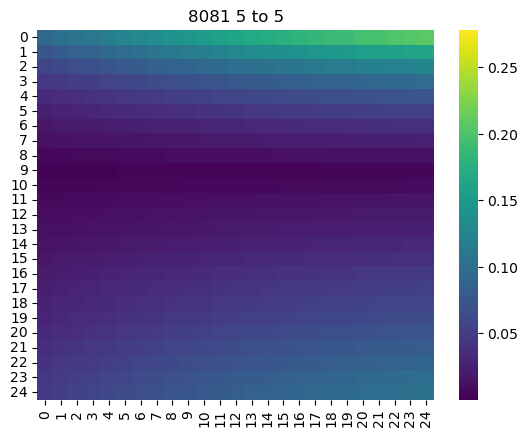

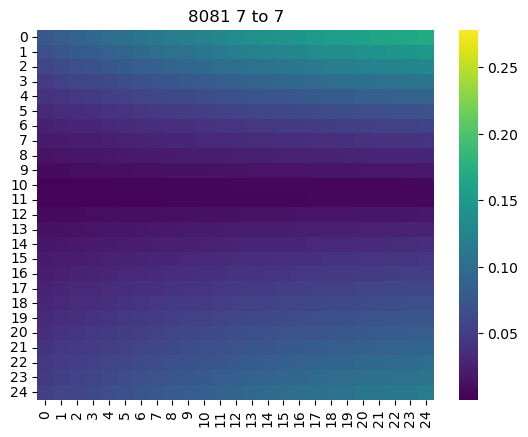

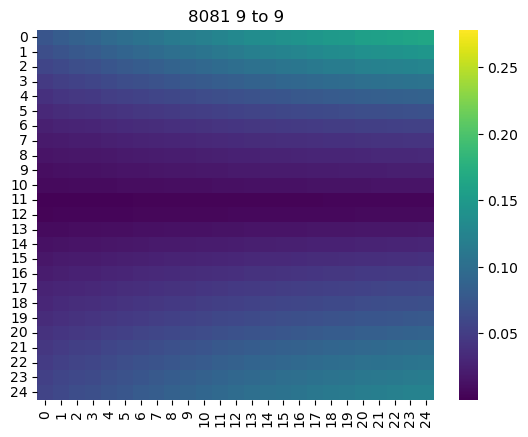

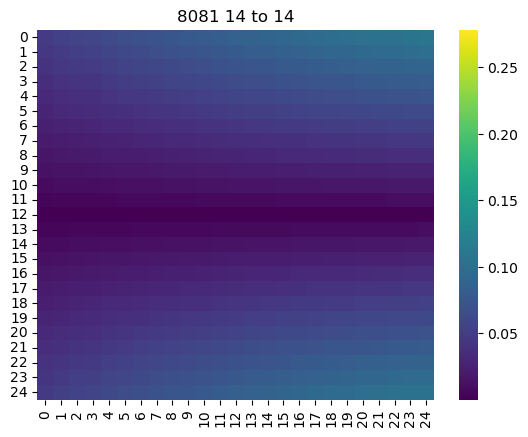

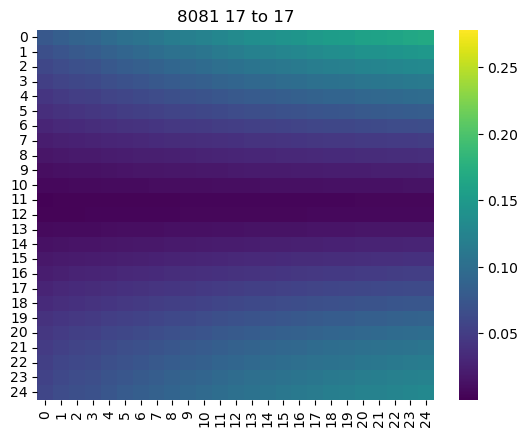

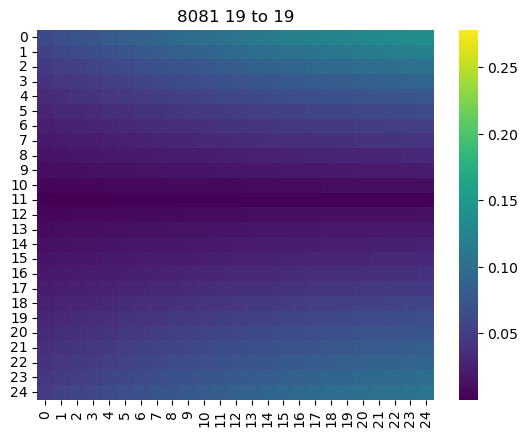

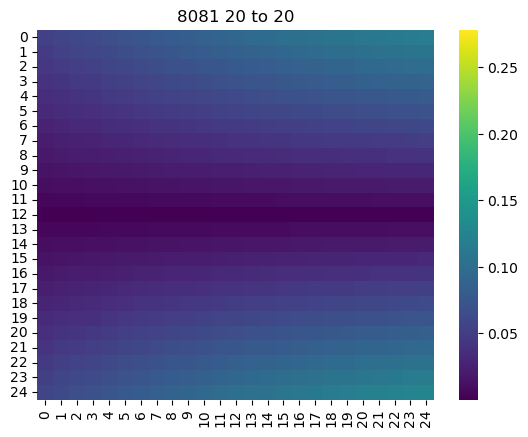

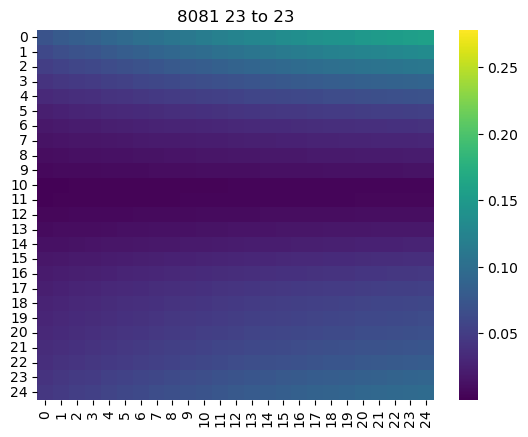

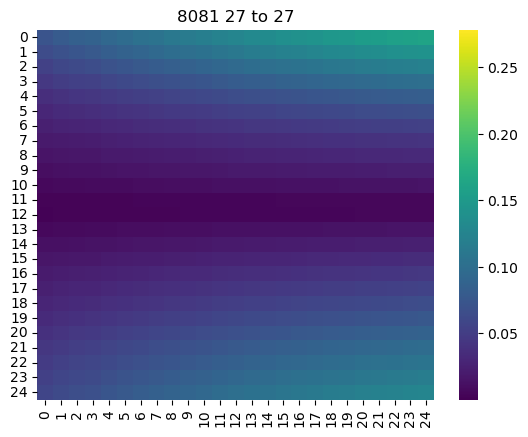

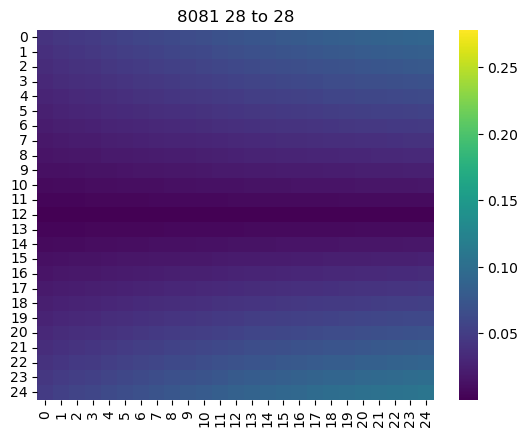

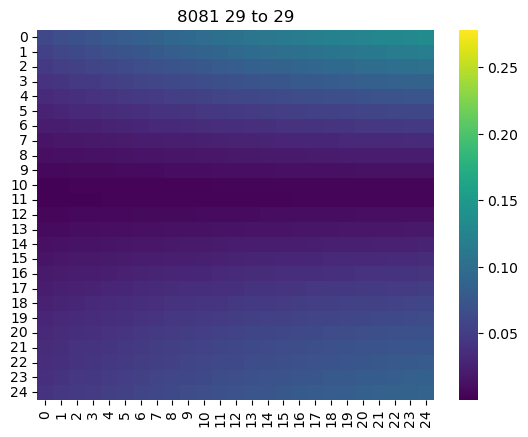

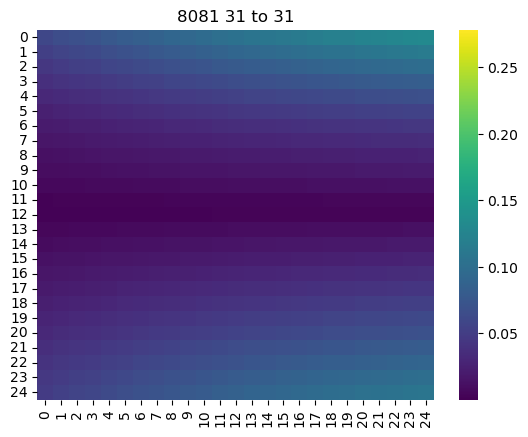

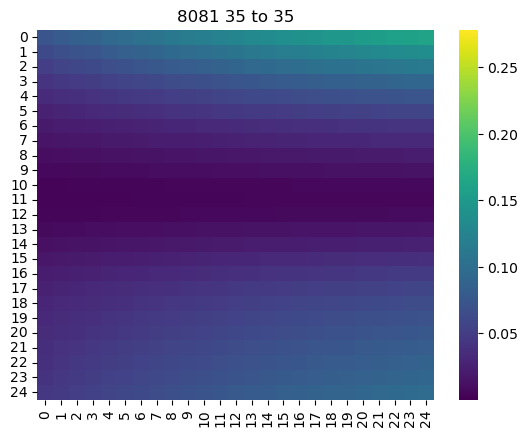

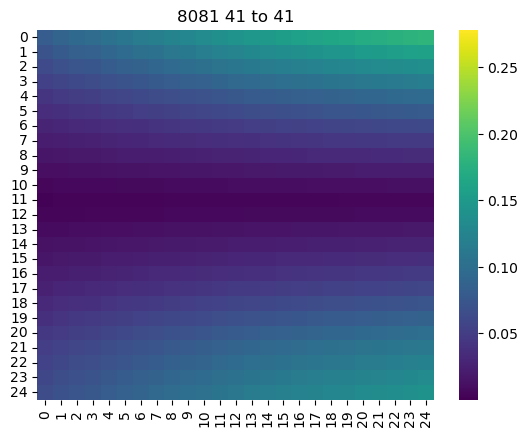

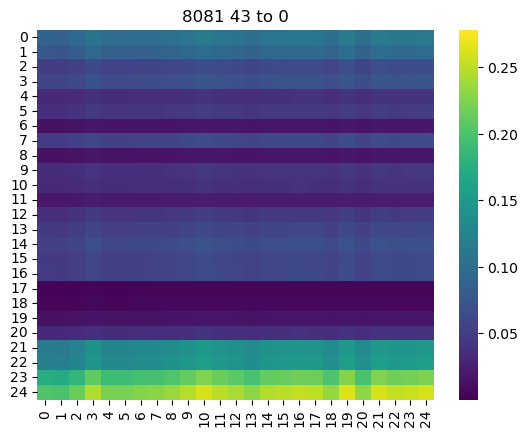

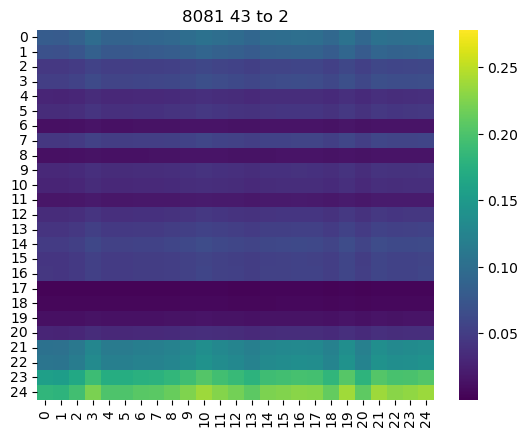

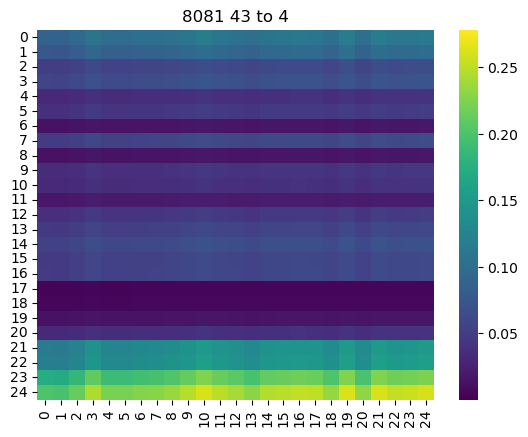

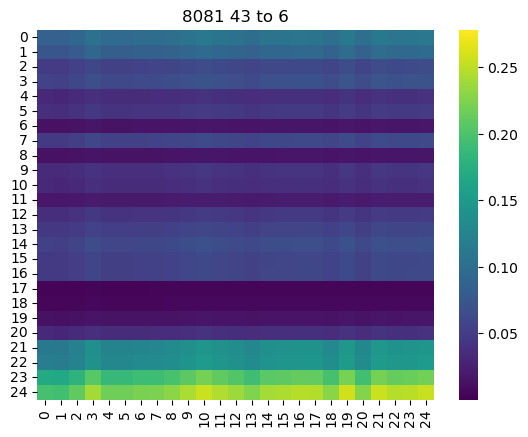

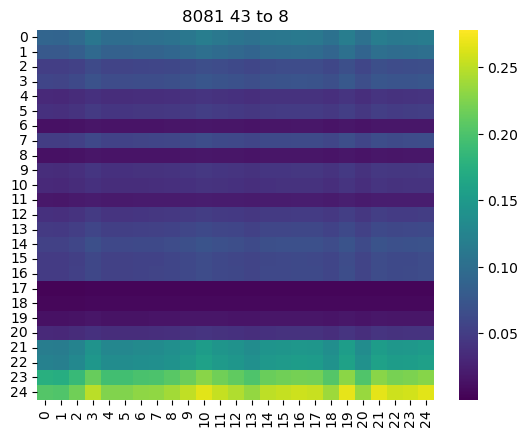

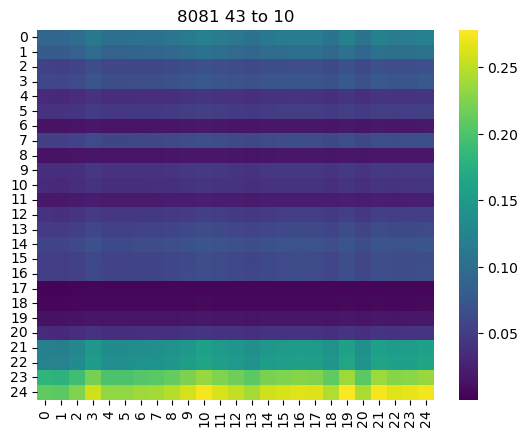

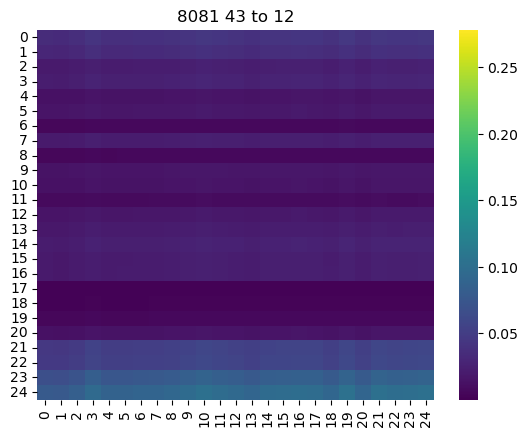

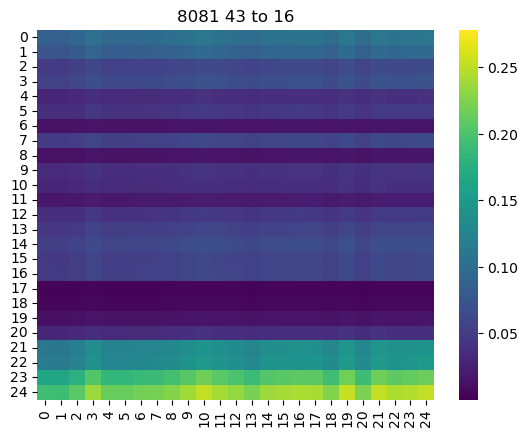

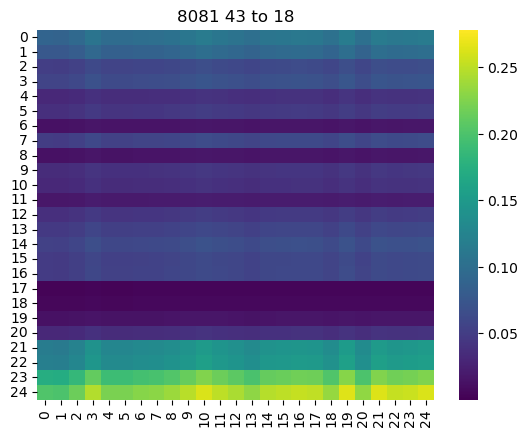

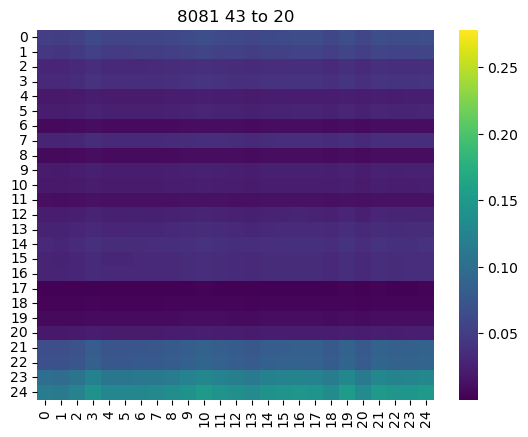

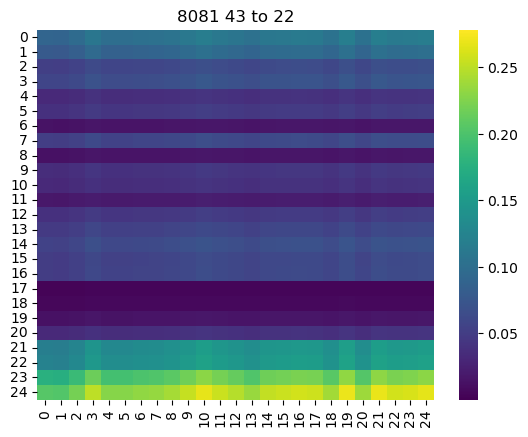

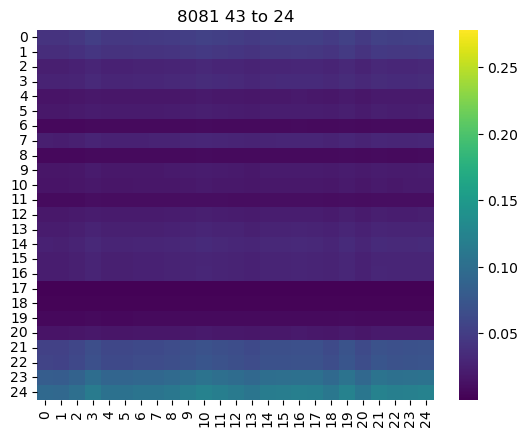

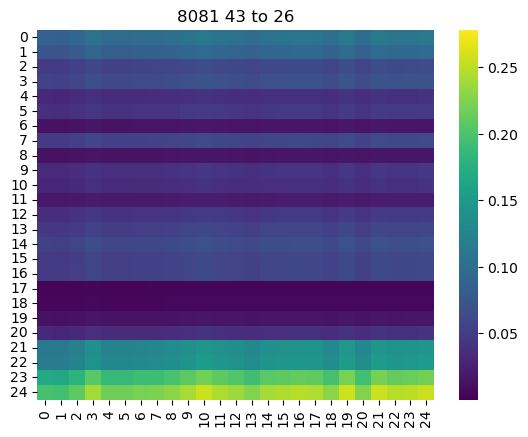

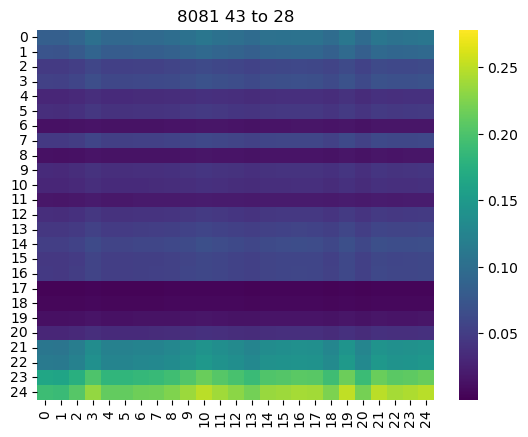

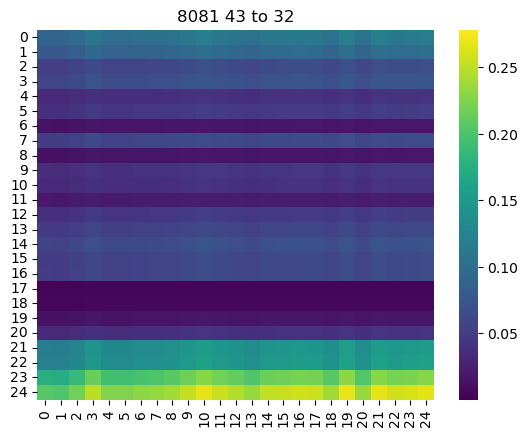

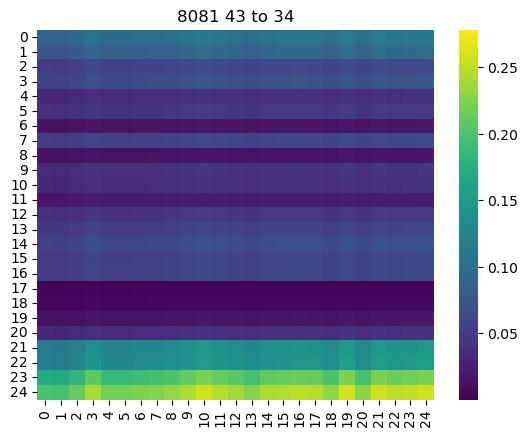

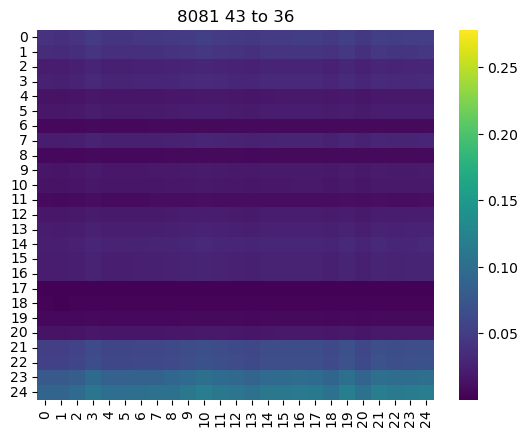

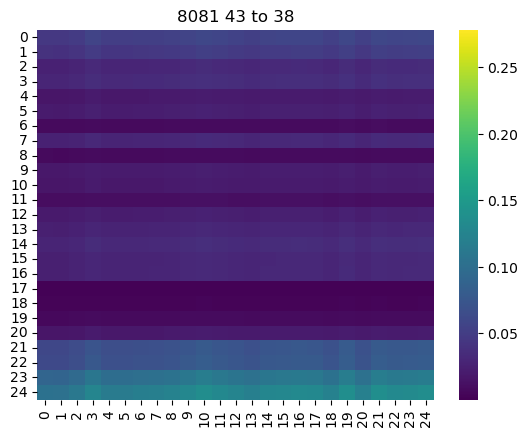

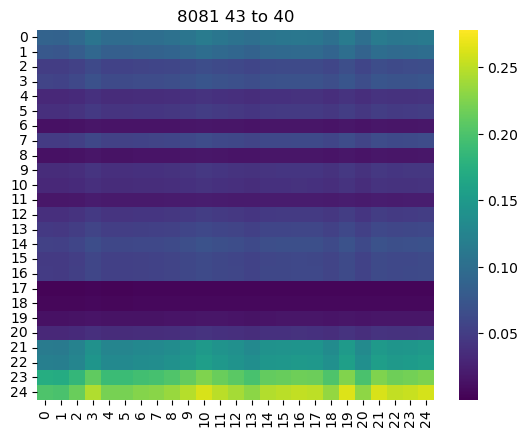

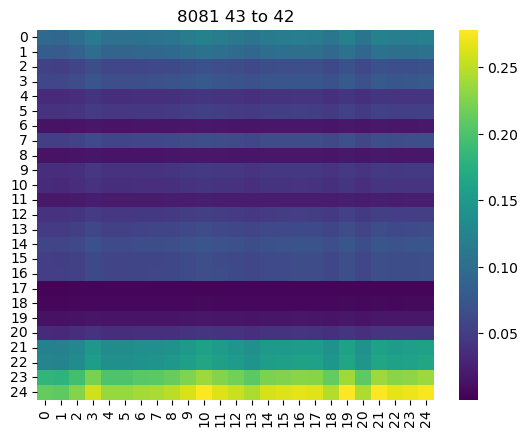

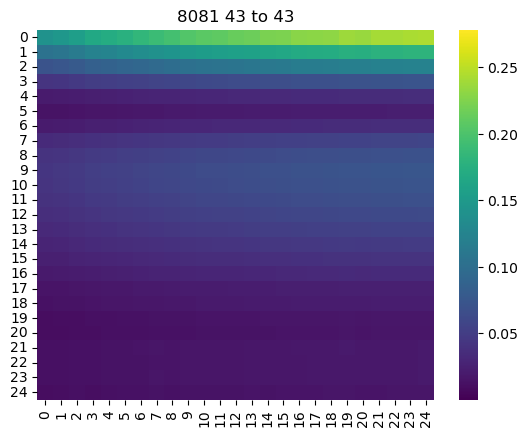

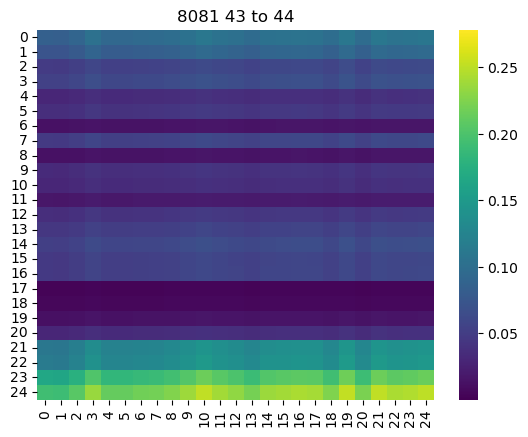

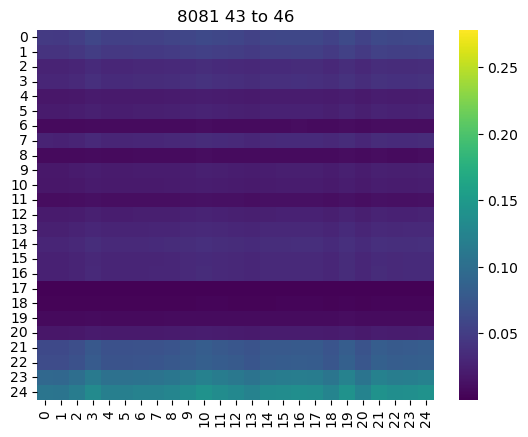

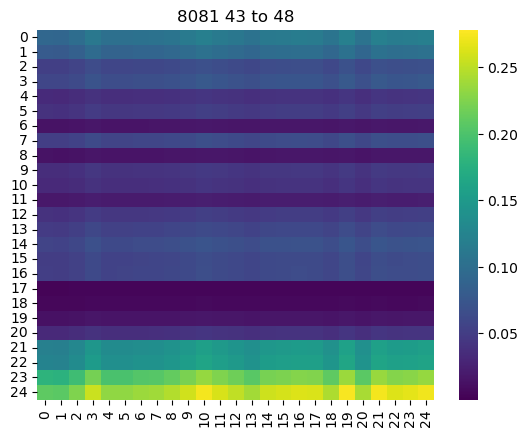

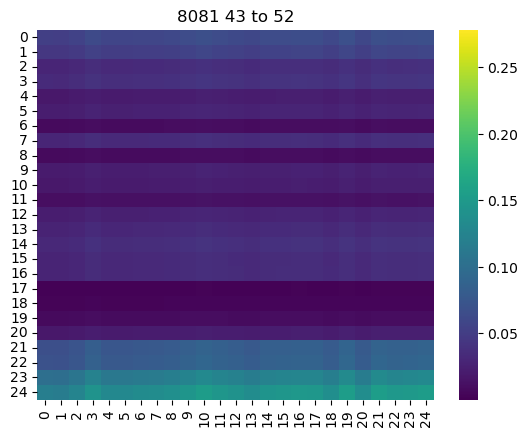

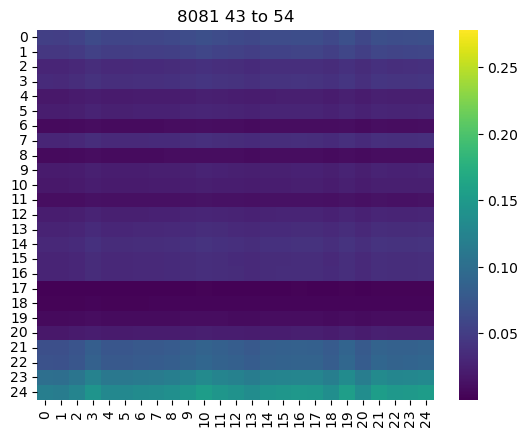

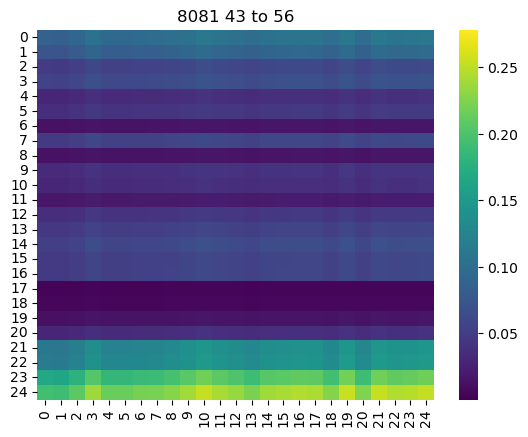

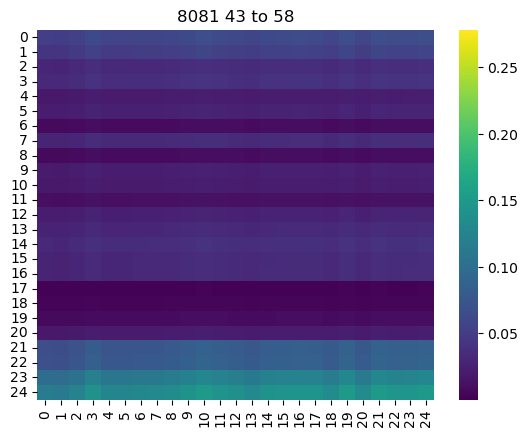

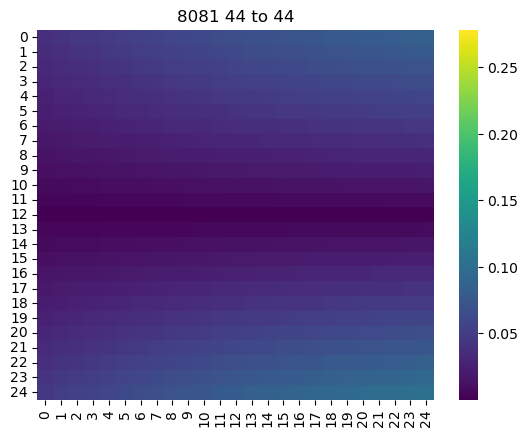

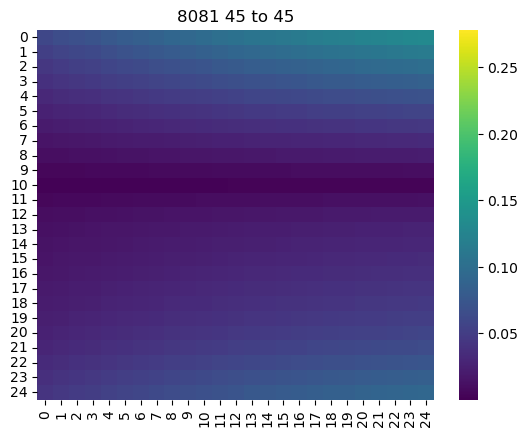

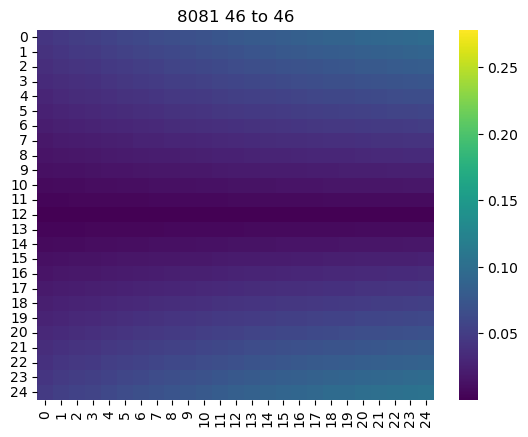

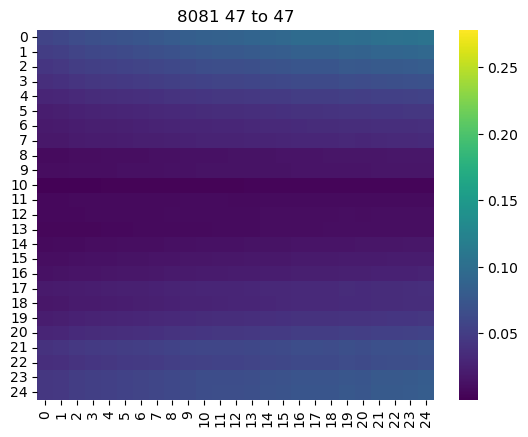

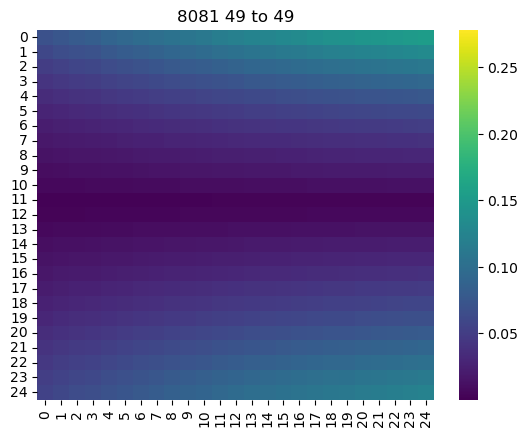

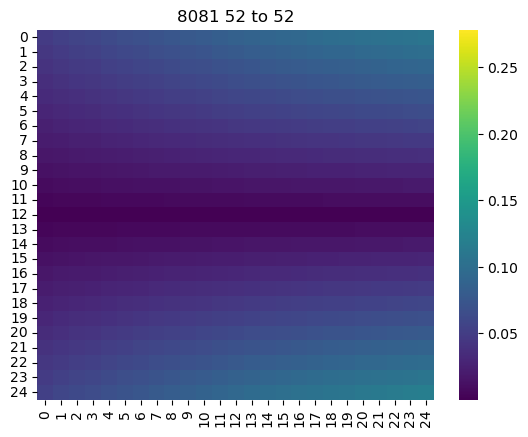

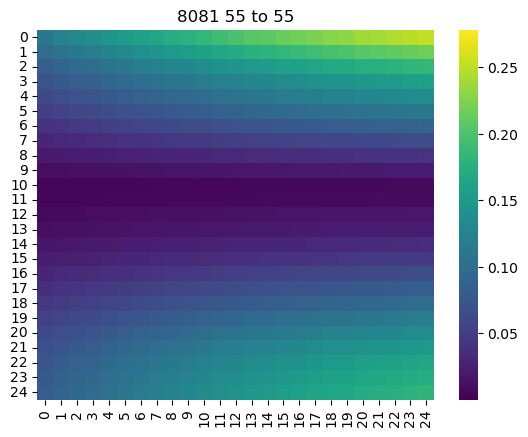

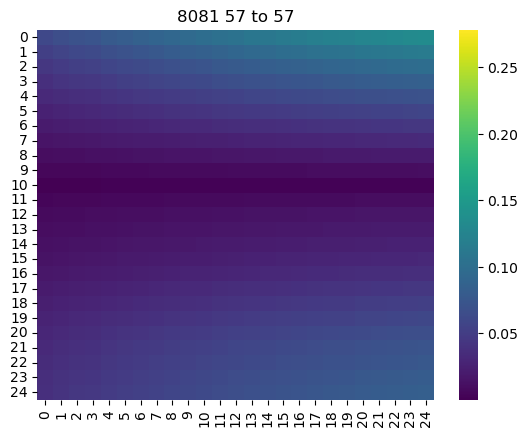

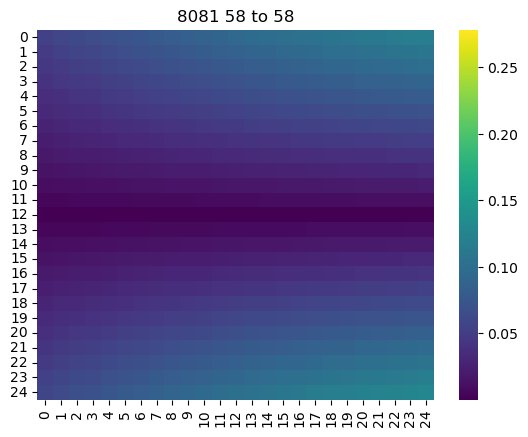

In [41]:
micro_analysis_ig(test_id, period=8081, dims=60, seed=0, causes='all', effects='all', eps=0.1)